Charger l'image.

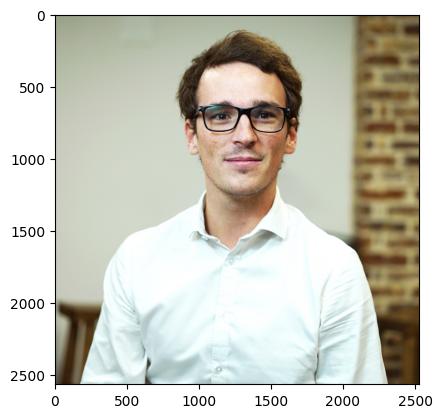

In [53]:
import skimage as ski
import matplotlib.pyplot as plt

image = ski.io.imread("romain.jpg")

plt.imshow(image)

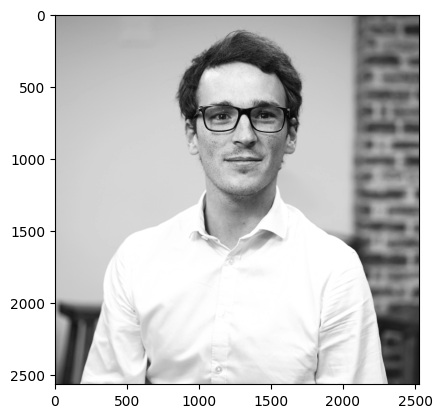

In [54]:
image = ski.color.rgb2gray(image)
plt.imshow(image, cmap="gray")

Filtre bilatéral

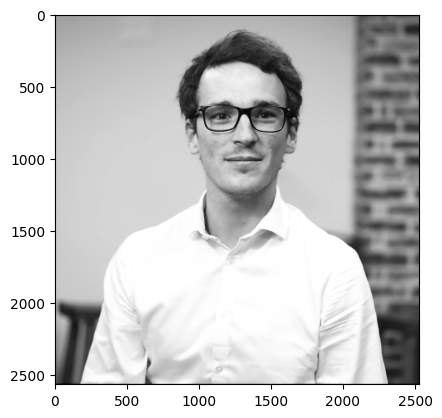

In [86]:
image = ski.restoration.denoise_bilateral(image, sigma_color=0.05, sigma_spatial=2)
plt.imshow(image, cmap="gray")

Trouver les bords de l'image.

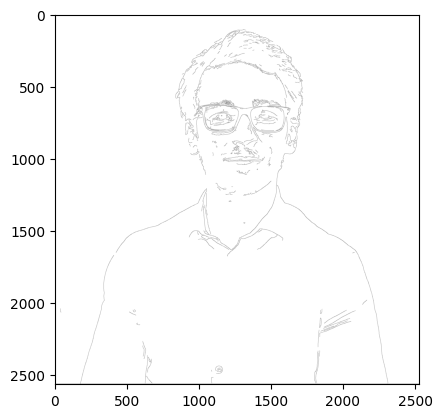

In [89]:
edge_image = ski.feature.canny(image)
plt.imshow(1 - edge_image, cmap="gray")


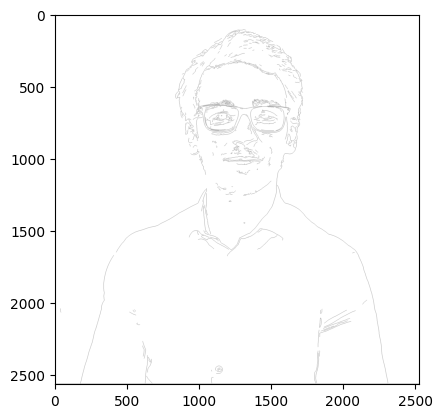

In [91]:
import numpy as np
from skimage.morphology import skeletonize
edge_image = 1 - skeletonize(edge_image)
plt.imshow(edge_image, cmap="gray")

Regrouper les bords de l'image en composantes connexes.

In [92]:
from edge_walker import group_edges

edge_groups = group_edges(edge_image)

2529
2566
(2566, 2529)
35496
0
31869
235
31616
76
31446
47
31352
50
31300
0
31277
0
31250
0
31249
21
31222
0
31221
0
31208
0
31207
0
31205
0
31199
0
31150
0
31128
0
31127
0
31126
7
31114
0
31057
11
31043
0
30987
27
30958
35
30916
0
30894
0
30893
12
30879
51
30825
0
30805
0
30778
0
30754
21
30713
0
30677
0
30647
0
30646
0
30630
17
30601
0
30589
0
30536
22
30512
34
30474
14
30457
0
30411
0
30390
0
30389
0
30388
0
30386
12
30372
31
30339
0
30338
123
30212
0
30195
0
30131
0
30130
0
30128
0
30127
0
30094
21
30063
0
30032
0
30031
0
30014
0
29985
0
29966
30
29930
0
29929
17
29909
0
29907
0
29895
0
29845
20
29822
1
29801
0
29800
0
29798
0
29786
0
29761
0
29740
7
29724
0
29619
3
29598
0
29582
21
29543
9
29530
0
29522
0
29510
0
29483
15
29466
0
29456
0
29430
0
29407
12
29377
0
29374
36
29336
21
29313
0
29281
89
29183
0
29182
0
29181
0
29054
0
29053
0
29052
0
29037
0
29036
13
29021
0
29002
21
28976
8
28966
0
28965
11
28952
23
28924
36
28865
0
28864
0
28850
0
28835
0
28776
0
28775
2
28770
0
28769


In [93]:
print(len(edge_groups))

899


<Axes: ylabel='Count'>

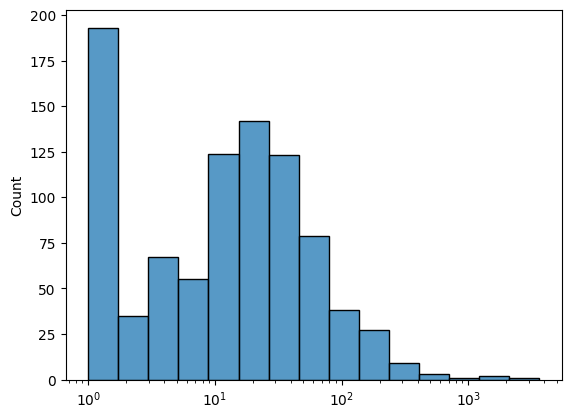

In [94]:
edge_group_lens = []
for g in edge_groups:
    edge_group_lens.append(len(g))

import seaborn as sns

sns.histplot(edge_group_lens, log_scale=True)

Filter and scale edges.

In [97]:
min_edge_length = 9
step = 2

max_length=max(image.shape[0], image.shape[1])

filtered_edge_groups = []

for point_group in edge_groups:
    if len(point_group) >= min_edge_length:
        filtered_edge_groups.append(point_group[::step].copy()/max_length)

len(filtered_edge_groups)

549

In [62]:
# import pickle
# with open("nicolas_dessin_5.pkl", "wb") as f:
#     pickle.dump(filtered_edge_groups, f)
#     f.close()

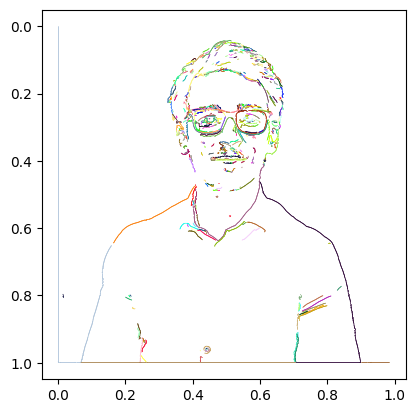

In [98]:
import matplotlib.colors as mcolors
cs = list(mcolors.XKCD_COLORS.values())*1000


plt.gca().invert_yaxis()
for c, point_group in zip(cs, filtered_edge_groups):
    preceding_point = point_group[0]
    for p in point_group[1::step]:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c=c, linewidth=0.5)
        preceding_point = p.copy()

plt.gca().set_aspect("equal")

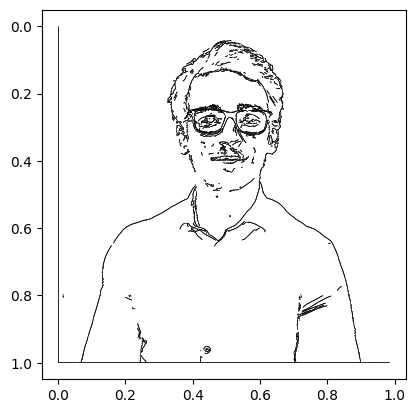

In [99]:
plt.gca().invert_yaxis()
for c, point_group in zip(cs, filtered_edge_groups):
    preceding_point = point_group[0]
    for p in point_group[1::step]:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c="black", linewidth=0.5)
        preceding_point = p.copy()

plt.gca().set_aspect("equal")

In [65]:
# harris_image = ski.feature.corner_harris(image)
# equalized_harris = ski.exposure.equalize_hist(harris_image)
# plt.imshow(equalized_harris, cmap="gray")

In [66]:
# import numpy as np

# corner_peaks = ski.feature.corner_peaks(harris_image, threshold_rel=0.01)

# plt.imshow(image, cmap="gray")
# corners = np.array(corner_peaks).T
# print(corners)
# plt.scatter(corners[1], corners[0])

In [67]:
# from edge_walker import group_edges

# edge_groups = group_edges(equalized_harris, 0.2)
# print(len(edge_groups))
# for edge in edge_groups:
#     plt.plot(edge.T[0], edge.T[1])

In [68]:
# hough_lines = ski.transform.probabilistic_hough_line(edge_image, line_length=6, line_gap=2, threshold=20)
# hough_lines = np.array(hough_lines)

# print(len(hough_lines))

# # hough_lines = hough_lines/max(image.shape[0], image.shape[1])

# plt.gca().invert_yaxis()
# for line in hough_lines:
#     p0, p1 = line
#     plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
# plt.gca().set_aspect('equal')

In [69]:
# import pickle

# with open("tomcruise.pkl", "wb") as f:
#     pickle.dump(hough_lines,f)
#     f.close()


In [70]:
# grouped_lines = [[l] for l in hough_lines]
# print(len(grouped_lines))

# something_changed = True

# THRESHOLD = 10

# def close_line(l, lines, threshold):
#     for i, l2 in enumerate(lines):
#         for k, p in enumerate([l[0][0], l[-1][1]]):
#             for j, p2 in enumerate([l2[0][0], l2[-1][1]]):
#                 if np.linalg.norm(np.array(p) - np.array(p2)) < threshold:
#                     return i, j, k

# while something_changed:
#     something_changed = False
#     for i, gl in enumerate(grouped_lines):
#         r = close_line(gl, grouped_lines[i+1:], threshold=THRESHOLD)
#         if r is not None:
#             something_changed = True
#             l, p, k = r
#             if k != p:
#                 gl = gl[::-1]
#             if p == 0:
#                 grouped_lines[i] += grouped_lines[l+i+1]
#                 grouped_lines.pop(l+i+1)
#             else:
#                 grouped_lines[l+i+1] += grouped_lines[i]
#                 grouped_lines.pop(i)
#             break

In [71]:
# for i in range(len(grouped_lines)):
#     grouped_lines[i] = np.array(grouped_lines[i])

# len(grouped_lines)

In [72]:
# for i in range(len(grouped_lines)):
#     grouped_lines[i] = grouped_lines[i]/float(max(image.shape[0], image.shape[1]))

# grouped_lines

In [73]:
# import matplotlib.colors as mcolors
# cs = mcolors.XKCD_COLORS

# plt.gca().invert_yaxis()
# for c, line_group in zip(cs, grouped_lines):
#     preceding_line = None
#     for line in line_group:
#         p0, p1 = line
#         if preceding_line is not None:
#             n0, n1 = preceding_line
#             plt.plot((n1[0], p0[0]), (n1[1], p0[1]), c=c)
#         preceding_line = line
#         plt.plot((p0[0], p1[0]), (p0[1], p1[1]), c=c)
# plt.gca().set_aspect('equal')

In [74]:
# from numpy import arctan

# def angle(line):
#     p0, p1 = line
#     if p1[0] - p0[0] != 0:
#         return arctan((p1[1] - p0[1])/(p1[0] - p0[0]))
#     elif p1[1] - p0[1] < 0:
#         return -np.pi/2
#     else:
#         return np.pi/2

# slope_threshold = np.pi/3

# new_groups = []
# uptos = []
# angles = []

# for line_group in grouped_lines:
#     new_groups.append([])
#     for i in range(len(line_group) - 1):
#         upto = 0
#         angles.append(abs(angle(line_group[i]) - angle(line_group[i+upto+1])))
#         while i+upto+1 < len(line_group) and abs(angle(line_group[i]) - angle(line_group[i+upto+1])) < slope_threshold:
#             upto+=1
#         uptos.append(upto)
#         new_groups[-1].append((line_group[i][0], line_group[i+upto][1]))
#         i += upto

# uptos = np.array(uptos)
# angle_diffs =np.array(angles)
# import seaborn
# seaborn.histplot(uptos)

In [75]:
# import pickle
# with open("grouped_lines_tom_cruise.pkl", "wb") as f:
#     pickle.dump(grouped_lines, f)
#     f.close()

In [76]:
# total = 0

# plt.gca().invert_yaxis()
# for line_group in new_groups:
#     preceding_line = None
#     for line in line_group:
#         total += 1
#         p0, p1 = line
#         if preceding_line is not None:
#             n0, n1 = preceding_line
#             plt.plot((n1[0], p0[0]), (n1[1], p0[1]), c=(200,0,0))
#         preceding_line = line
#         plt.plot((p0[0], p1[0]), (p0[1], p1[1]), c=(0,0,0))
# plt.gca().set_aspect('equal')

# total